In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
print(train_df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
print(train_df.isnull().sum().sum())

0


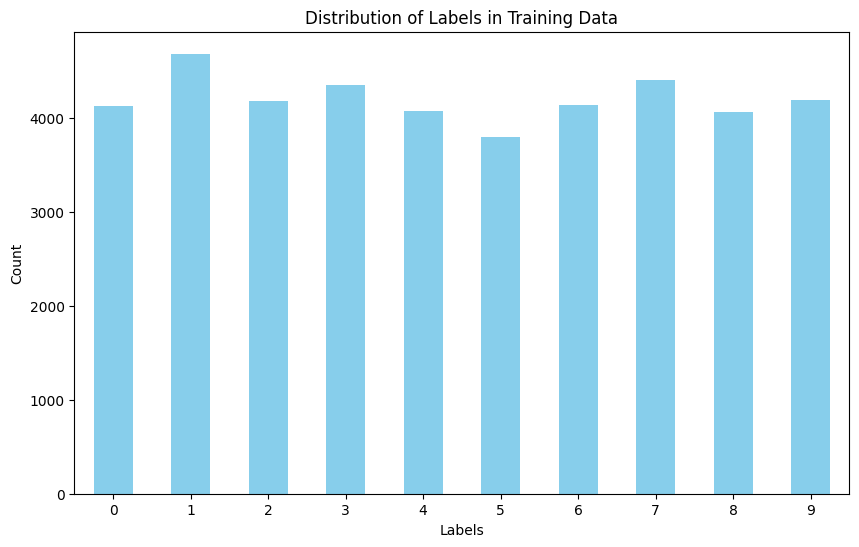

In [5]:
train_df['label'].value_counts().sort_index().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Labels in Training Data")
plt.xticks(rotation=0)
plt.show()

In [6]:
X = train_df.drop(columns=['label']).values
y = train_df['label'].values

In [7]:
# Normalize the pixel values
X = X / 255.0

In [8]:
# Reshape data to fit the model input (28x28x1)
X = X.reshape(-1, 28, 28, 1)

In [9]:
# Convert labels to categorical format
y = to_categorical(y, num_classes=10)

In [10]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=33)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.metrics import F1Score

In [12]:

# Build the CNN model
cnn_model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [13]:
# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'precision', 'recall', F1Score(average='macro')])

In [14]:
# Train the model
cnn_history = cnn_model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.7447 - f1_score: 0.7422 - loss: 0.7718 - precision: 0.8733 - recall: 0.6415 - val_accuracy: 0.9729 - val_f1_score: 0.9726 - val_loss: 0.0875 - val_precision: 0.9780 - val_recall: 0.9682
Epoch 2/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9561 - f1_score: 0.9559 - loss: 0.1415 - precision: 0.9649 - recall: 0.9493 - val_accuracy: 0.9810 - val_f1_score: 0.9807 - val_loss: 0.0603 - val_precision: 0.9829 - val_recall: 0.9792
Epoch 3/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9688 - f1_score: 0.9686 - loss: 0.1039 - precision: 0.9747 - recall: 0.9639 - val_accuracy: 0.9852 - val_f1_score: 0.9850 - val_loss: 0.0490 - val_precision: 0.9867 - val_recall: 0.9837
Epoch 4/15
525/525 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.9745 - f1_score: 0.9744 - loss: 0.0813 - precision: 0.9785 - recall: 0.9713 - val_accuracy: 0.9844 - val_f1_score: 0.9842 - val_loss: 0.0500 - val_precision: 0.9858 - val_rec

In [ ]:
val_loss, val_acc, val_precision, val_recall, val_f1score = cnn_model.evaluate(X_val, y_val)
print(f"Validation accuracy for CNN: {val_acc}, precision: {val_precision}, recall: { val_recall }, F1: { val_f1score }")

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - f1_score: 0.9913 - loss: 0.0239 - precision: 0.9918 - recall: 0.9911
Validation accuracy for CNN: 0.9910714030265808, precision: 0.991304337978363, recall: 0.9907143115997314, F1: 0.9908807873725891


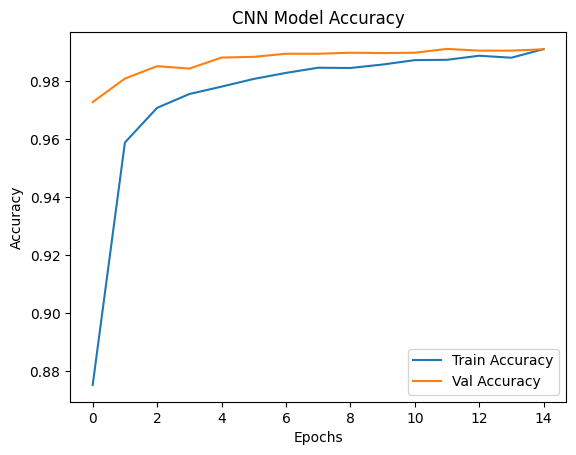

In [16]:
# Plot training and validation accuracy
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

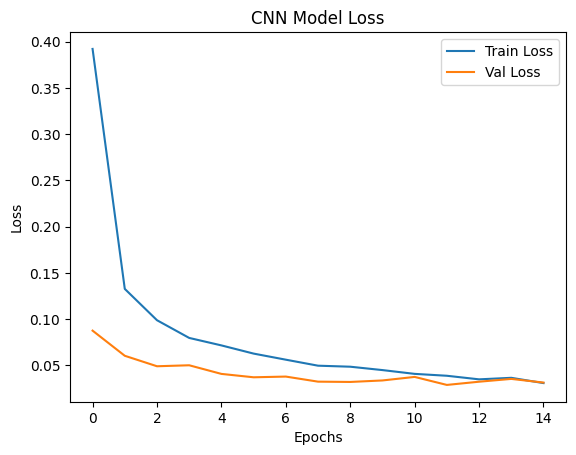

In [17]:
# Plot training and validation loss
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
# Visualize some predictions
predictions = cnn_model.predict(X_val)
predictions = np.argmax(predictions, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


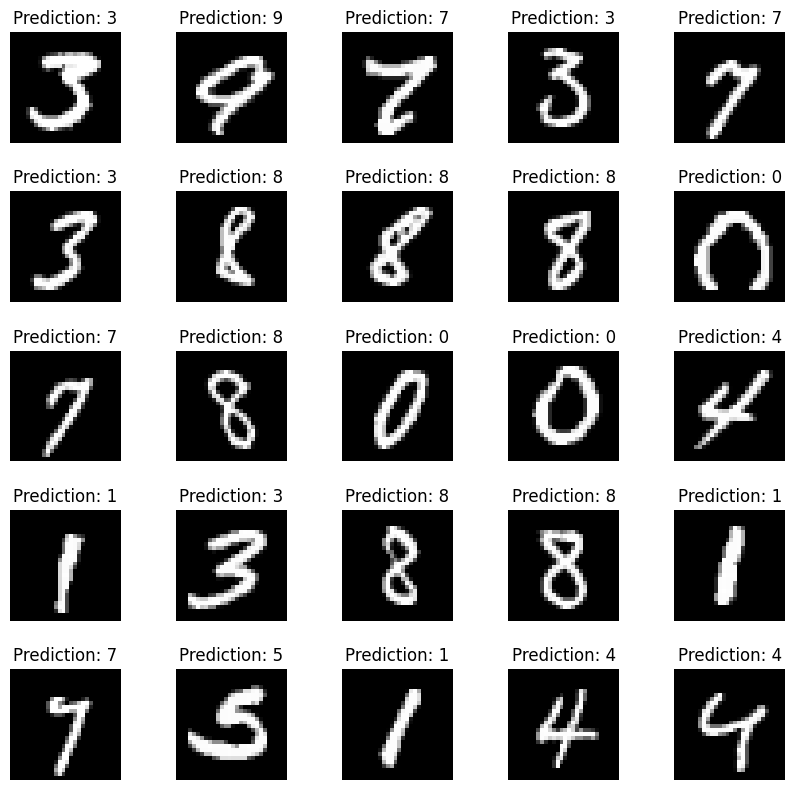

In [19]:
def visualize_predictions(test_data, predictions):
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    axes = axes.ravel()

    for i in np.arange(0, 25):
        axes[i].imshow(test_data[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Prediction: {predictions[i]}")
        axes[i].axis('off')
    plt.subplots_adjust(wspace=0.5)
    plt.show()

visualize_predictions(X_val, predictions)

In [20]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)

# Convert one-hot encoded labels to single integer labels
y_train_labels = np.argmax(y_train, axis=1)
y_val_labels = np.argmax(y_val, axis=1)

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

svm_model.fit(X_train_flat, y_train_labels)

y_val_pred = svm_model.predict(X_val_flat)
svm_val_accuracy = accuracy_score(y_val_labels, y_val_pred)
svm_val_f1 = f1_score(y_val_labels, y_val_pred, average='macro')
svm_val_precision = precision_score(y_val_labels, y_val_pred, average='macro')
svm_val_recall = recall_score(y_val_labels, y_val_pred, average='macro')

print(f"SVM Validation Accuracy: {svm_val_accuracy}, Precision: {svm_val_precision}, Recall: {svm_val_recall}, F1 Score: {svm_val_f1}")

SVM Validation Accuracy: 0.9771428571428571, Precision: 0.9767728935366554, Recall: 0.9768287336887307, F1 Score: 0.9767873825699326


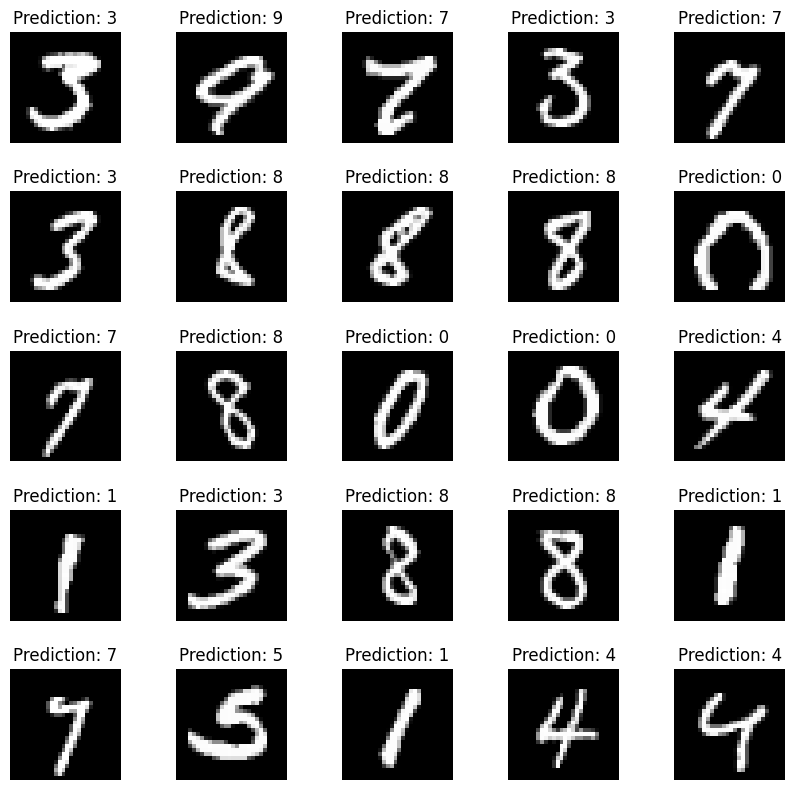

In [22]:
visualize_predictions(X_val_flat, y_val_pred)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)

knn_model.fit(X_train_flat, y_train_labels)

y_val_pred_knn = knn_model.predict(X_val_flat)
val_accuracy = accuracy_score(y_val_labels, y_val_pred_knn)
val_f1 = f1_score(y_val_labels, y_val_pred_knn, average='macro')
val_precision = precision_score(y_val_labels, y_val_pred_knn, average='macro')
val_recall = recall_score(y_val_labels, y_val_pred_knn, average='macro')

print(f"k-NN Validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}")

k-NN Validation Accuracy: 0.9669047619047619, Precision: 0.9672370183681052, Recall: 0.966093332197063, F1 Score: 0.9664817906326674


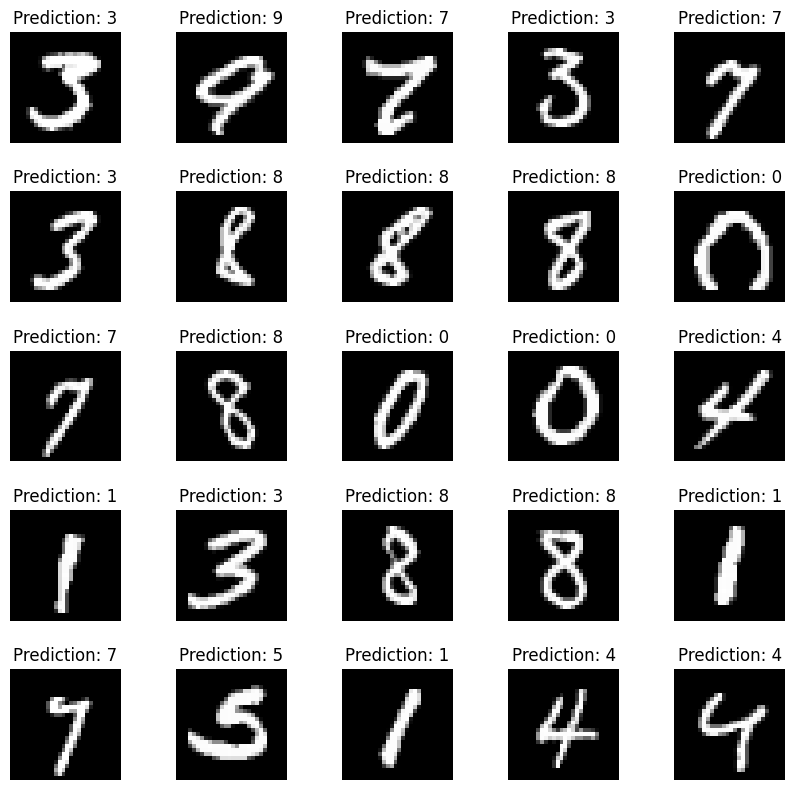

In [24]:
visualize_predictions(X_val_flat, y_val_pred_knn)